# <span style="color:blue">**Feature Engineering**</span>

A feature is a numeric representation of raw data. There are many ways to turn raw
data into numeric measurements, which is why features can end up looking like a lot
of things. Naturally, features must derive from the type of data that is available. Per‐
haps less obvious is the fact that they are also tied to the model; some models are
more appropriate for some types of features, and vice versa. The right features are rel‐
evant to the task at hand and should be easy for the model to ingest. Feature engineer‐
ing is the process of formulating the most appropriate features given the data, the
model, and the task.
The number of features is also important. If there are not enough informative fea‐
tures, then the model will be unable to perform the ultimate task. If there are too
many features, or if most of them are irrelevant, then the model will be more expen‐
sive and tricky to train. Something might go awry in the training process that impacts
the model’s performance.

## **Beginner Examples: How to Create Features**


### **Numerical Feature**

In [1]:
ages = [25, 30, 35, 40, 45, 50]
average_age = sum(ages) / len(ages)
print(f"Average age: {average_age}")

Average age: 37.5


### **Categorical Feature**

In [2]:
import pandas as pd

data = {
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female']
}
df = pd.DataFrame(data)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])

print(df[['Name', 'Gender', 'Gender_Encoded']])


      Name  Gender  Gender_Encoded
0    Alice  Female               0
1      Bob    Male               1
2  Charlie    Male               1
3    David    Male               1
4      Eve  Female               0


### **Time-series Feature**

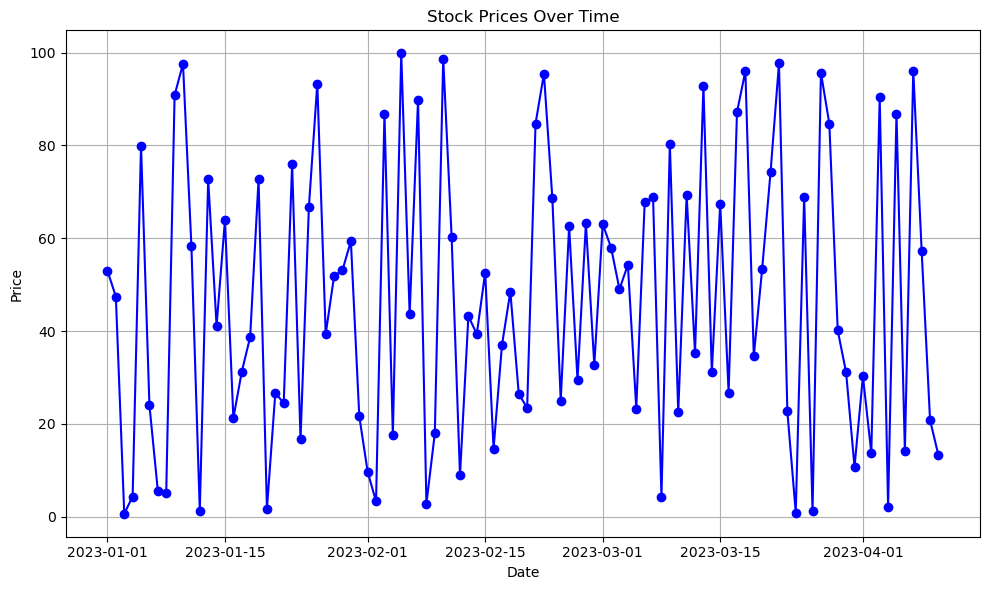

In [3]:
import pandas as pd
import numpy as np

dates = pd.date_range('2023-01-01', periods=100)
prices = np.random.rand(100) * 100  

df = pd.DataFrame({'Date': dates, 'Price': prices})

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', color='b')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


### **Text Feature**

In [4]:
from textblob import TextBlob
reviews = [
    "This product is excellent! Highly recommended.",
    "Poor quality, do not buy.",
    "Average product, could be better.",
    "Outstanding performance, worth the price."
]

sentiments = [TextBlob(review).sentiment.polarity for review in reviews]

for i, review in enumerate(reviews):
    print(f"Review {i+1}: '{review}'")
    print(f"Sentiment Polarity: {sentiments[i]}")
    if sentiments[i] > 0:
        print("Sentiment: Positive")
    elif sentiments[i] < 0:
        print("Sentiment: Negative")
    else:
        print("Sentiment: Neutral")
    print()


Review 1: 'This product is excellent! Highly recommended.'
Sentiment Polarity: 0.58
Sentiment: Positive

Review 2: 'Poor quality, do not buy.'
Sentiment Polarity: -0.4
Sentiment: Negative

Review 3: 'Average product, could be better.'
Sentiment Polarity: 0.175
Sentiment: Positive

Review 4: 'Outstanding performance, worth the price.'
Sentiment Polarity: 0.4
Sentiment: Positive



# <span style="color:blue"> **Supervision Tasks**</span>


### **Feature selection** 

In [5]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



### **Fetch Data:**

In [6]:
data = fetch_openml(name='boston', version=1, as_frame=True)
df = data.frame

### **Display Data**

In [7]:
print(df.head())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


### **Separate Features and Target:**

In [8]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['MEDV'])  
y = df['MEDV'] 

### **Split Data**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### **Correlation** 

In [10]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.204714,0.398900,-0.044403,0.397537,-0.211067,0.327862,-0.371648,0.625157,0.584742,0.296126,-0.295436,0.411733
ZN,-0.204714,1.000000,-0.541711,-0.045746,-0.528372,0.283038,-0.588892,0.680791,-0.314233,-0.303360,-0.387815,0.174141,-0.400369
INDUS,0.398900,-0.541711,1.000000,0.092081,0.765589,-0.407962,0.634078,-0.707426,0.573143,0.690435,0.352287,-0.344083,0.590459
CHAS,-0.044403,-0.045746,0.092081,1.000000,0.134121,0.110442,0.094295,-0.120954,0.029485,0.005804,-0.108223,0.036933,-0.075012
NOX,0.397537,-0.528372,0.765589,0.134121,1.000000,-0.305938,0.720445,-0.772363,0.579431,0.643520,0.154996,-0.352482,0.583904
RM,-0.211067,0.283038,-0.407962,0.110442,-0.305938,1.000000,-0.222909,0.213575,-0.204595,-0.286865,-0.337429,0.115692,-0.626074
AGE,0.327862,-0.588892,0.634078,0.094295,0.720445,-0.222909,1.000000,-0.754827,0.413676,0.456773,0.244575,-0.240588,0.557407
DIS,-0.371648,0.680791,-0.707426,-0.120954,-0.772363,0.213575,-0.754827,1.000000,-0.474244,-0.518822,-0.222734,0.276802,-0.483950
RAD,0.625157,-0.314233,0.573143,0.029485,0.579431,-0.204595,0.413676,-0.474244,1.000000,0.910165,0.477659,-0.404579,0.457871
TAX,0.584742,-0.303360,0.690435,0.005804,0.643520,-0.286865,0.456773,-0.518822,0.910165,1.000000,0.454195,-0.412199,0.510175


### **Correlation Heatmap**

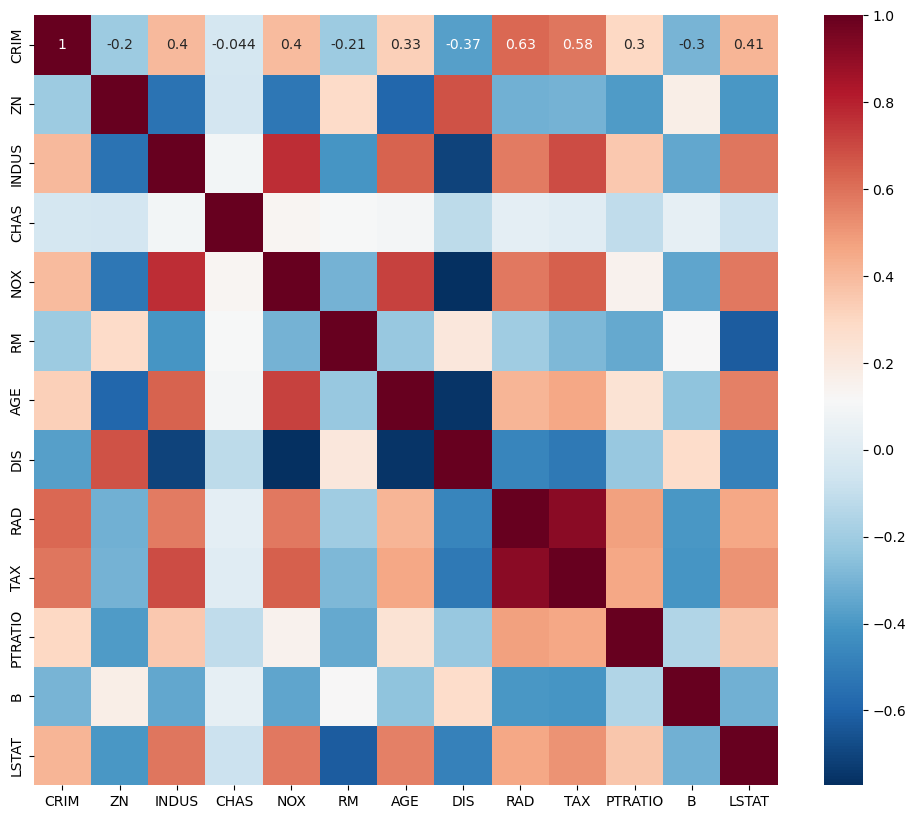

In [11]:
import seaborn as sns
plt.figure(figsize=(12, 10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap='RdBu_r', annot_kws={"size": 10})
plt.show()


### **Identify Correlated Features**

In [12]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to hold the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # We are interested in the absolute correlation value
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


### **Drop Correlated Features**

In [13]:
corr_features = correlation(X_train, threshold=0.7)
print("Correlated features to drop:", corr_features)
print("Number of correlated features:", len(corr_features))

X_train.drop(corr_features, axis=1, inplace=True)

print("Remaining columns after dropping correlated features:")
print(X_train.columns)


Correlated features to drop: {'NOX', 'TAX', 'AGE', 'DIS'}
Number of correlated features: 4
Remaining columns after dropping correlated features:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'B', 'LSTAT'], dtype='object')


In [14]:
X_train.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
RM          float64
RAD        category
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

### **Model and Evaluations**

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

corr_features = correlation(X_train, 0.7)

X_train.drop(columns=corr_features, inplace=True)
X_test.drop(columns=corr_features, inplace=True)

numeric_features = X_train.select_dtypes(include=['float64']).columns
categorical_features = X_train.select_dtypes(include=['category']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
pipeline.fit(X_train, y_train)


y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")


Training RMSE: 4.91
Testing RMSE: 5.16


### **Visulization**

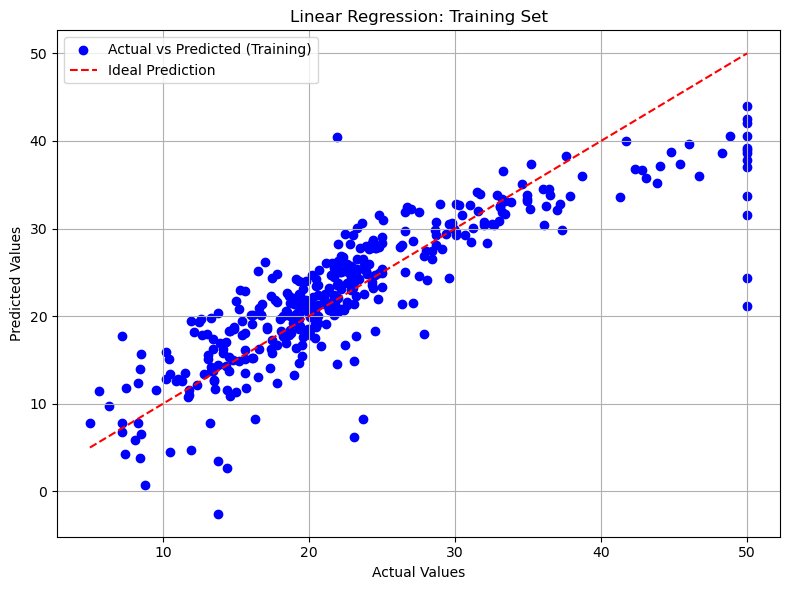

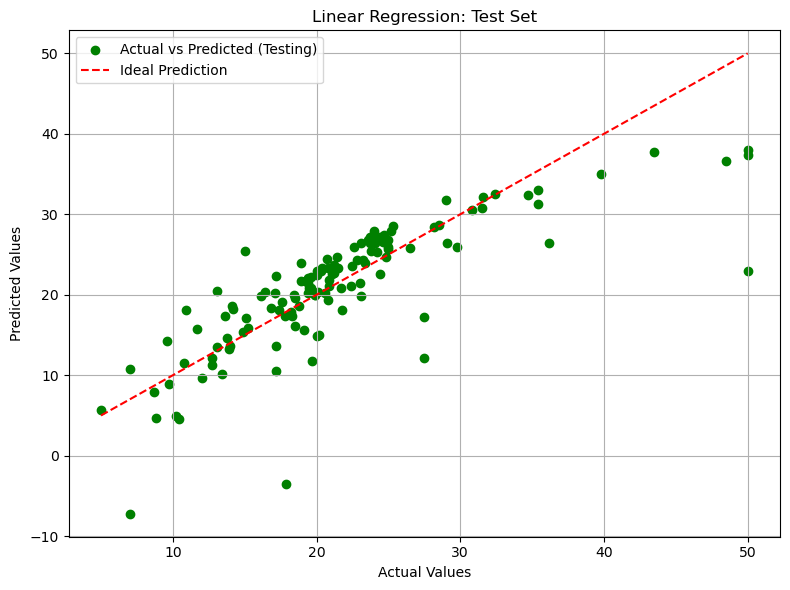

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Training Set')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Test Set')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Feature transmation**


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


###  **Split data into training and testing sets**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  **Initialize Logistic Regression model**

In [19]:
model = LogisticRegression(max_iter=10000)

### **Fit the model**

In [20]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### **Evaluate accuracy on test data**

In [21]:
y_pred = model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)
print(f"Accuracy on original data: {accuracy_original}")

Accuracy on original data: 0.956140350877193


###  **Standardization**

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy after Standardization: {accuracy_scaled}")

Accuracy after Standardization: 0.9736842105263158


### **Normalization (Min-Max Scaling)**

In [23]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

model.fit(X_train_normalized, y_train)
y_pred_normalized = model.predict(X_test_normalized)
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
print(f"Accuracy after Normalization: {accuracy_normalized}")

Accuracy after Normalization: 0.9824561403508771


### **Logarithmic Transformation**

In [24]:
X_train_log = np.log1p(X_train_normalized)  # Log transform requires non-negative values
X_test_log = np.log1p(X_test_normalized)

# Retrain model after logarithmic transformation
model.fit(X_train_log, y_train)
y_pred_log = model.predict(X_test_log)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy after Logarithmic Transformation: {accuracy_log}")

Accuracy after Logarithmic Transformation: 0.9736842105263158


### **Visualizations using Seaborn**

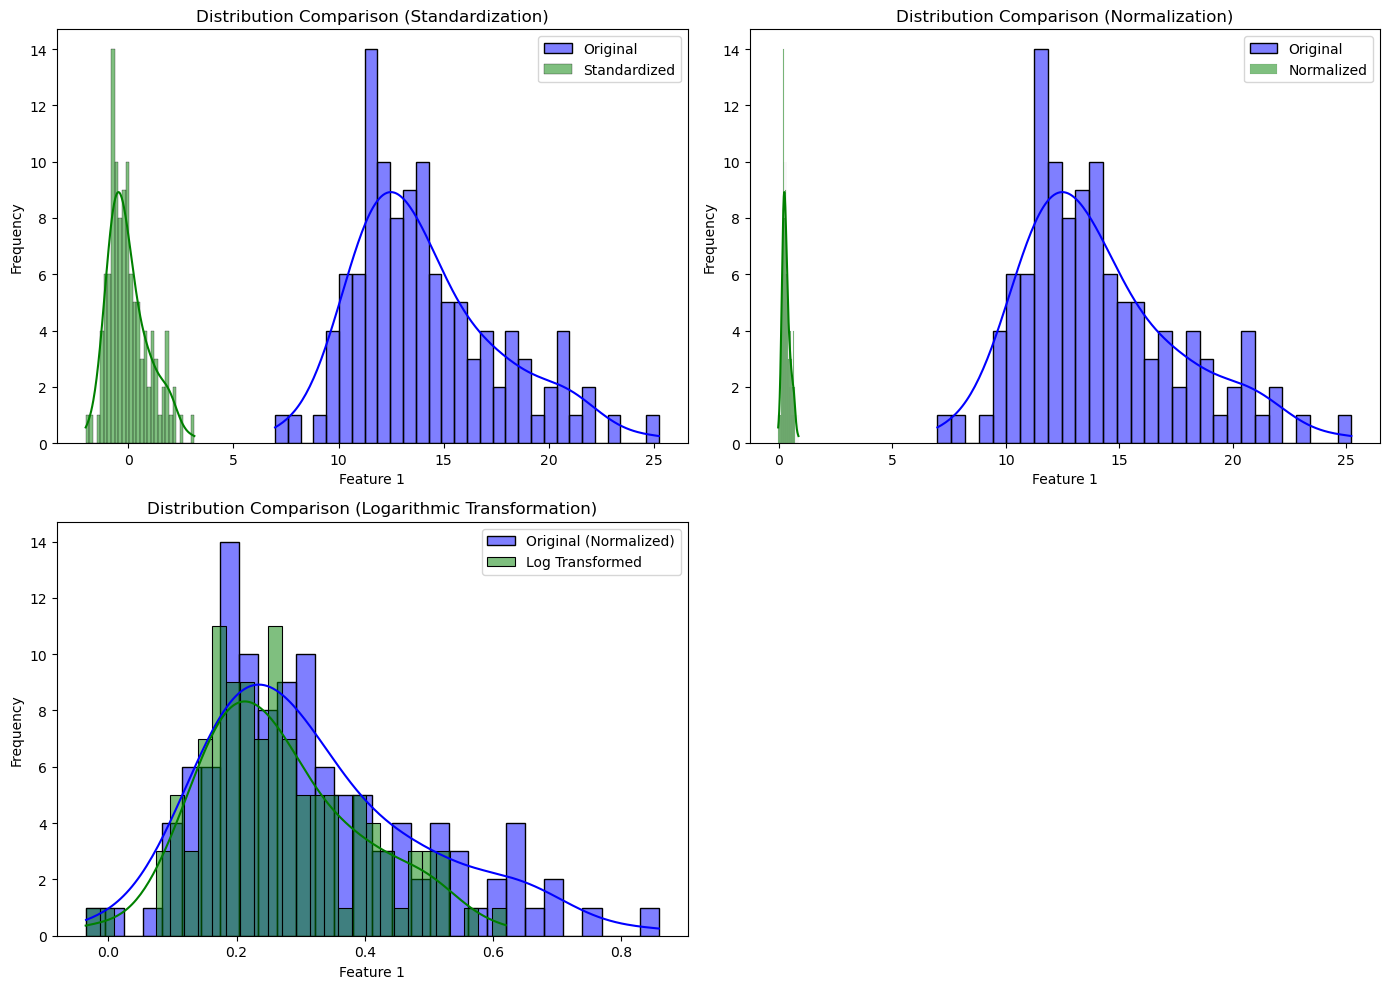

In [25]:
plt.figure(figsize=(14, 10))

# Plot distributions before and after standardization
plt.subplot(2, 2, 1)
sns.histplot(X_test[:, 0], bins=30, color='blue', label='Original', kde=True)
sns.histplot(X_test_scaled[:, 0], bins=30, color='green', label='Standardized', kde=True)
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title('Distribution Comparison (Standardization)')
plt.legend()

# Plot distributions before and after normalization
plt.subplot(2, 2, 2)
sns.histplot(X_test[:, 0], bins=30, color='blue', label='Original', kde=True)
sns.histplot(X_test_normalized[:, 0], bins=30, color='green', label='Normalized', kde=True)
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title('Distribution Comparison (Normalization)')
plt.legend()

# Plot distributions before and after logarithmic transformation
plt.subplot(2, 2, 3)
sns.histplot(X_test_normalized[:, 0], bins=30, color='blue', label='Original (Normalized)', kde=True)
sns.histplot(X_test_log[:, 0], bins=30, color='green', label='Log Transformed', kde=True)
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title('Distribution Comparison (Logarithmic Transformation)')
plt.legend()

plt.tight_layout()
plt.show()

# **Feature Creations**

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target

### **Split data ,intilize model, fit model on train data, evaluate accuracy of test data**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred_original = model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy on original data: {accuracy_original}")


Accuracy on original data: 0.956140350877193


###  **Feature Creation: Interaction Feature**
### **Example: Creating an interaction feature between mean radius and mean texture in X_test and fit model and compare accuracy**

In [28]:
mean_radius_test = X_test[:, data.feature_names.tolist().index('mean radius')]
mean_texture_test = X_test[:, data.feature_names.tolist().index('mean texture')]
interaction_feature_test = mean_radius_test * mean_texture_test


interaction_feature_test = interaction_feature_test.reshape(-1, 1)
X_test_with_interaction = np.hstack((X_test, interaction_feature_test))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_with_interaction_scaled = scaler.transform(X_test_with_interaction[:, :-1])  # Exclude the interaction feature
model.fit(X_train_scaled, y_train)

y_pred_with_interaction = model.predict(X_test_with_interaction_scaled)
accuracy_with_interaction = accuracy_score(y_test, y_pred_with_interaction)
print(f"Accuracy after creating interaction feature: {accuracy_with_interaction}")



Accuracy after creating interaction feature: 0.9736842105263158


### **Viuslization**

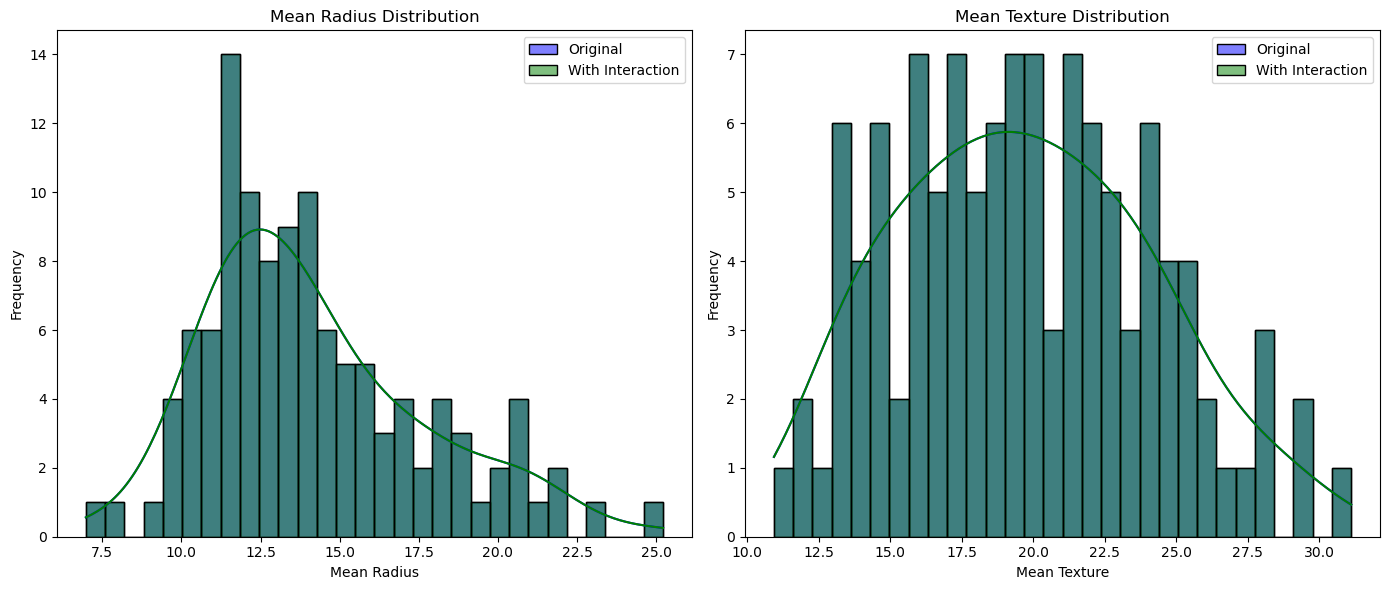

In [29]:
# Visualizations using Seaborn
plt.figure(figsize=(14, 6))

# Plot histogram of mean radius
plt.subplot(1, 2, 1)
sns.histplot(X_test[:, data.feature_names.tolist().index('mean radius')], bins=30, color='blue', label='Original', kde=True)
sns.histplot(X_test_with_interaction[:, data.feature_names.tolist().index('mean radius')], bins=30, color='green', label='With Interaction', kde=True)
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.title('Mean Radius Distribution')
plt.legend()

# Plot histogram of mean texture
plt.subplot(1, 2, 2)
sns.histplot(X_test[:, data.feature_names.tolist().index('mean texture')], bins=30, color='blue', label='Original', kde=True)
sns.histplot(X_test_with_interaction[:, data.feature_names.tolist().index('mean texture')], bins=30, color='green', label='With Interaction', kde=True)
plt.xlabel('Mean Texture')
plt.ylabel('Frequency')
plt.title('Mean Texture Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# **Polynomial Features**

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

### **Split, intilize model and fit model plus accuracy and evaluation**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)
print(f"Accuracy on original data: {accuracy_original}")

Accuracy on original data: 0.956140350877193


### **Polynomial Features (Degree 2, 3, and 4)**

In [32]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train)
X_test_poly4 = poly4.transform(X_test)

scaler = StandardScaler()
X_train_poly2_scaled = scaler.fit_transform(X_train_poly2)
X_test_poly2_scaled = scaler.transform(X_test_poly2)

X_train_poly3_scaled = scaler.fit_transform(X_train_poly3)
X_test_poly3_scaled = scaler.transform(X_test_poly3)

X_train_poly4_scaled = scaler.fit_transform(X_train_poly4)
X_test_poly4_scaled = scaler.transform(X_test_poly4)

model.fit(X_train_poly2_scaled, y_train)
y_pred_poly2 = model.predict(X_test_poly2_scaled)
accuracy_poly2 = accuracy_score(y_test, y_pred_poly2)
print(f"Accuracy after Polynomial Features (Degree 2): {accuracy_poly2}")

model.fit(X_train_poly3_scaled, y_train)
y_pred_poly3 = model.predict(X_test_poly3_scaled)
accuracy_poly3 = accuracy_score(y_test, y_pred_poly3)
print(f"Accuracy after Polynomial Features (Degree 3): {accuracy_poly3}")

model.fit(X_train_poly4_scaled, y_train)
y_pred_poly4 = model.predict(X_test_poly4_scaled)
accuracy_poly4 = accuracy_score(y_test, y_pred_poly4)
print(f"Accuracy after Polynomial Features (Degree 4): {accuracy_poly4}")



Accuracy after Polynomial Features (Degree 2): 0.9736842105263158
Accuracy after Polynomial Features (Degree 3): 0.9649122807017544
Accuracy after Polynomial Features (Degree 4): 0.9473684210526315


### **Visulizations**

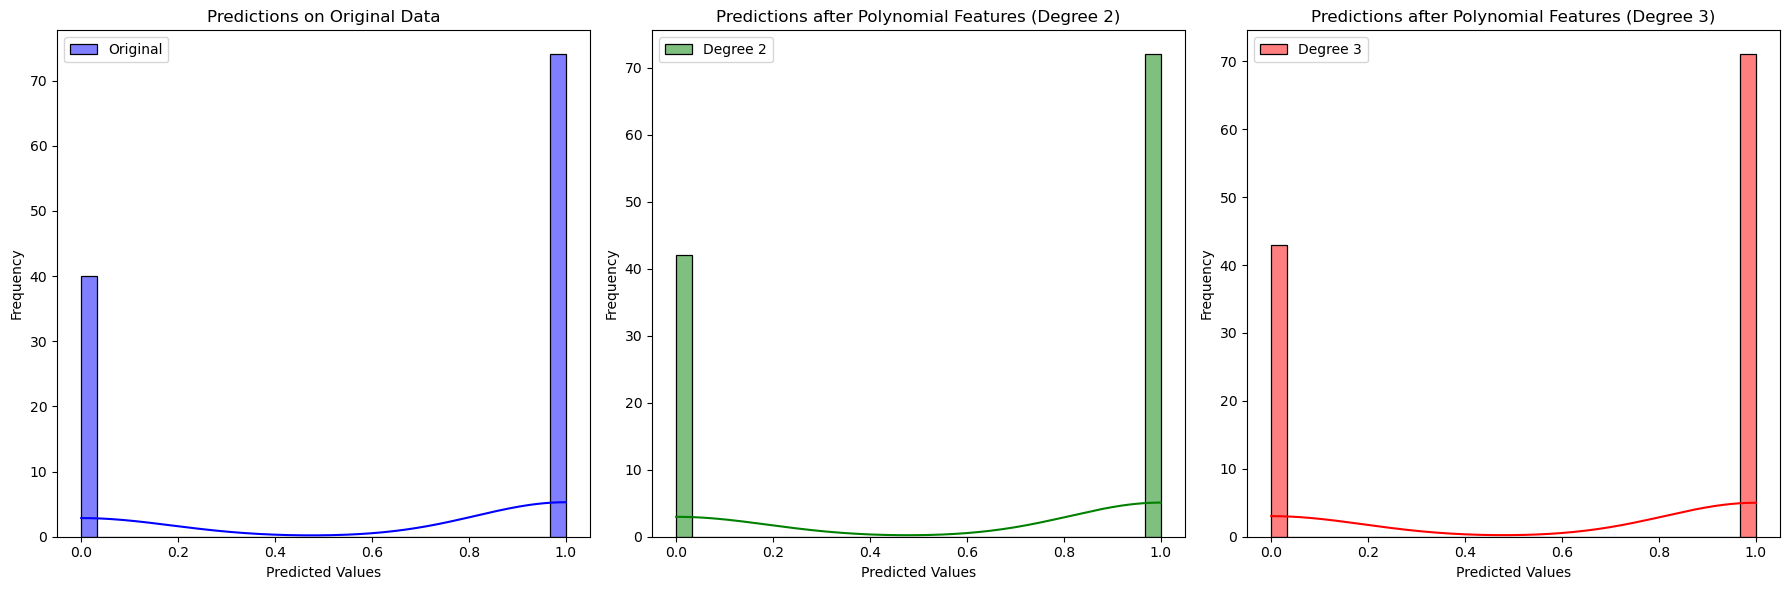

In [33]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(y_pred, bins=30, color='blue', label='Original', kde=True)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Predictions on Original Data')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(y_pred_poly2, bins=30, color='green', label='Degree 2', kde=True)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Predictions after Polynomial Features (Degree 2)')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(y_pred_poly3, bins=30, color='red', label='Degree 3', kde=True)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Predictions after Polynomial Features (Degree 3)')
plt.legend()

plt.tight_layout()
plt.show()


# **Handling Catogorical Varibles**

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from category_encoders import TargetEncoder, BinaryEncoder, CountEncoder


# Complex datastructure 
n_samples = 1000
categories = {
    'color': ['red', 'green', 'blue', 'yellow'],
    'animal': ['cat', 'dog', 'bird', 'rabbit', 'snake'],
    'rating': ['low', 'medium', 'high'],
    'location': ['urban', 'suburban', 'rural'],
    'season': ['spring', 'summer', 'fall', 'winter'],
    'fruit': ['apple', 'banana', 'orange', 'grape', 'kiwi'],
    'instrument': ['guitar', 'piano', 'violin', 'trumpet', 'drums'],
    'profession': ['doctor', 'teacher', 'engineer', 'artist', 'chef']
}


data = {
    'color': np.random.choice(categories['color'], n_samples),
    'animal': np.random.choice(categories['animal'], n_samples),
    'rating': np.random.choice(categories['rating'], n_samples),
    'location': np.random.choice(categories['location'], n_samples),
    'season': np.random.choice(categories['season'], n_samples),
    'fruit': np.random.choice(categories['fruit'], n_samples),
    'instrument': np.random.choice(categories['instrument'], n_samples),
    'profession': np.random.choice(categories['profession'], n_samples),
    'age': np.random.randint(18, 65, n_samples),  # Example numerical column
    'income': np.random.randint(20000, 100000, n_samples),  # Example numerical column
    'target': np.random.randint(0, 2, n_samples)  # Example target variable for classification
}

df = pd.DataFrame(data)



### **Apply Different Encoding Techniques***

In [35]:
categorical_cols = ['color', 'animal', 'rating', 'location', 'season', 'fruit', 'instrument', 'profession']

### **Method 1: One-Hot Encoding**

In [36]:
df_one_hot = pd.get_dummies(df, columns=categorical_cols)

### **Method 2: Label Encoding**

In [37]:
df_label = df.copy()
for col in categorical_cols:
    df_label[col] = df_label[col].astype('category').cat.codes

### **Method 3: Target Encoding**

In [38]:
encoder_target = TargetEncoder(cols=categorical_cols)
df_target = encoder_target.fit_transform(df[categorical_cols], df['target'])

### **Method 4: Binary Encoding**

In [39]:
encoder_binary = BinaryEncoder(cols=categorical_cols)
df_binary = encoder_binary.fit_transform(df[categorical_cols])

### **Method 5: Frequency Encoding**

In [40]:
encoder_frequency = CountEncoder(cols=categorical_cols)
df_frequency = encoder_frequency.fit_transform(df[categorical_cols])

## **Separate features and target variable**

In [41]:
X_one_hot = df_one_hot.drop('target', axis=1)
y = df_one_hot['target']
X_label = df_label.drop('target', axis=1)
X_target = df_target
X_binary = df_binary
X_frequency = df_frequency

### **Split data into train and test sets**

In [42]:
X_train_one_hot, X_test_one_hot, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2, random_state=42)
X_train_label, X_test_label = train_test_split(X_label, test_size=0.2, random_state=42)
X_train_target, X_test_target = train_test_split(X_target, test_size=0.2, random_state=42)
X_train_binary, X_test_binary = train_test_split(X_binary, test_size=0.2, random_state=42)
X_train_frequency, X_test_frequency = train_test_split(X_frequency, test_size=0.2, random_state=42)

### **Train and Evaluate a Model** 

In [43]:
rf_classifier = RandomForestClassifier(random_state=42)

def train_and_evaluate(X_train, X_test, y_train, y_test):
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

accuracy_one_hot = train_and_evaluate(X_train_one_hot, X_test_one_hot, y_train, y_test)
accuracy_label = train_and_evaluate(X_train_label, X_test_label, y_train, y_test)
accuracy_target = train_and_evaluate(X_train_target, X_test_target, y_train, y_test)
accuracy_binary = train_and_evaluate(X_train_binary, X_test_binary, y_train, y_test)
accuracy_frequency = train_and_evaluate(X_train_frequency, X_test_frequency, y_train, y_test)

print(f'Accuracy with One-Hot Encoding: {accuracy_one_hot}')
print(f'Accuracy with Label Encoding: {accuracy_label}')
print(f'Accuracy with Target Encoding: {accuracy_target}')
print(f'Accuracy with Binary Encoding: {accuracy_binary}')
print(f'Accuracy with Frequency Encoding: {accuracy_frequency}')


Accuracy with One-Hot Encoding: 0.485
Accuracy with Label Encoding: 0.505
Accuracy with Target Encoding: 0.515
Accuracy with Binary Encoding: 0.56
Accuracy with Frequency Encoding: 0.535


### **Visulization**

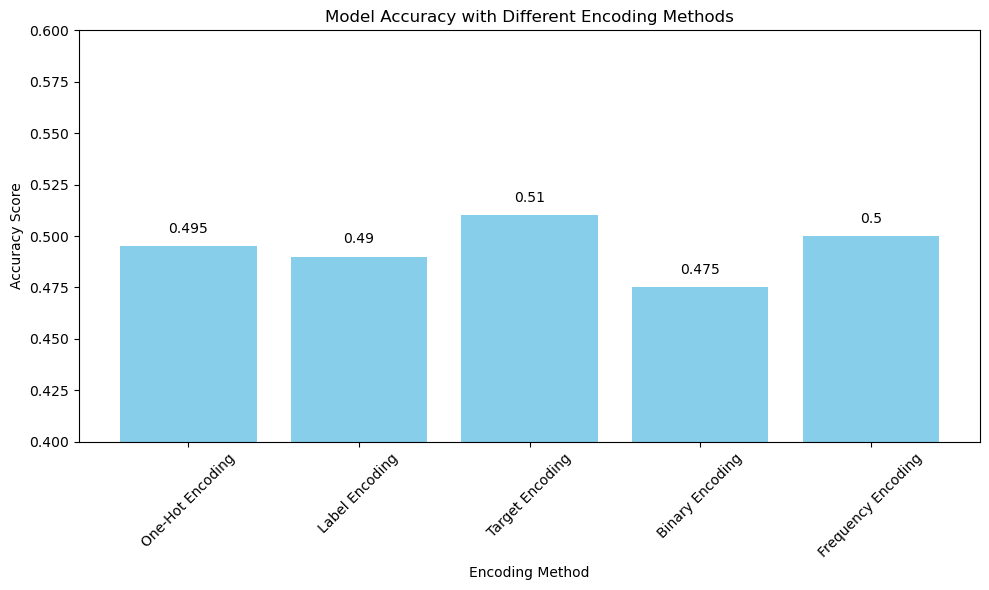

In [44]:
import matplotlib.pyplot as plt

accuracy_scores = {
    'One-Hot Encoding': 0.495,
    'Label Encoding': 0.49,
    'Target Encoding': 0.51,
    'Binary Encoding': 0.475,
    'Frequency Encoding': 0.5
}

plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Encoding Method')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy with Different Encoding Methods')
plt.ylim(0.4, 0.6)  # Setting y-axis limit for better visualization of differences
plt.xticks(rotation=45)
for index, value in enumerate(accuracy_scores.values()):
    plt.text(index, value + 0.005, str(round(value, 3)), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()
